<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [7]:
# Your Code Here
df_data = pd.read_csv('titanium.csv')
df_data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [8]:
# z-score
for col in df_data.columns:
    df_data[col] = (df_data[col] - df_data[col].mean()) / df_data[col].std()
df_data.head()

,x,y
0,-1.679650,-0.428220
1,-1.609665,-0.486883
2,-1.539679,-0.444219
3,-1.469694,-0.414887
4,-1.399708,-0.406888


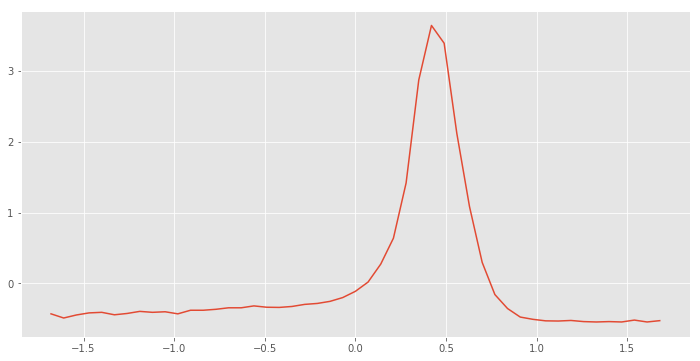

In [9]:
X = df_data.x
y = df_data.y

plt.plot(X, y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [10]:
from sklearn.metrics import mean_absolute_error

In [39]:
## Your Code Here
errors_lin = []
errors_poly = []
errors_rbf = []
def return_predicted_vector (model, X, y):
    model.fit (X.values.reshape(-1, 1), y.values)
    return model.predict (X.values.reshape(-1, 1))

for c in np.logspace(-2, 2, 10):
    #linear
    model = SVR(C=c, kernel='linear', epsilon=0.01)
    error = mean_absolute_error(y, return_predicted_vector(model, X, y))
    errors_lin.append(error)
    
    #poly
    model = SVR(C=c, kernel='poly', degree=3, gamma=6, coef0=1, epsilon=0.01)
    errors_poly.append(mean_absolute_error(y, return_predicted_vector(model, X, y)))
    
    #rbf
    model = SVR(C=c, kernel='rbf', gamma=6, coef0=1, epsilon=0.01)
    errors_rbf.append(mean_absolute_error(y, return_predicted_vector(model, X, y)))

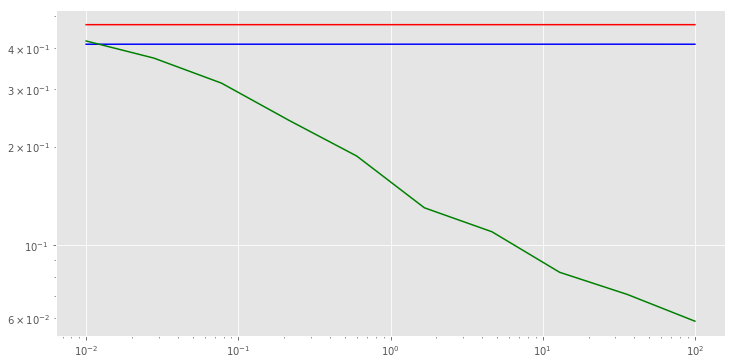

In [41]:
plt.loglog (np.logspace(-2, 2, 10), errors_lin, c='red')
plt.loglog (np.logspace(-2, 2, 10), errors_poly, c='blue')
plt.loglog (np.logspace(-2, 2, 10), errors_rbf, c='green')

In [43]:
best_error_lin, idx_lin = min((val, idx) for (idx, val) in enumerate(errors_lin))
best_error_poly, idx_poly = min((val, idx) for (idx, val) in enumerate(errors_poly))
best_error_rbf, idx_rbf = min((val, idx) for (idx, val) in enumerate(errors_rbf))

best_C_lin = np.logspace(-2, 2, 10)[idx_lin]
model = SVR(C=best_C_lin, kernel='linear', epsilon=0.01)
model.fit(X.values.reshape(-1, 1), y.values)
y_predicted_lin = model.predict(X.values.reshape(-1, 1))

best_C_poly = np.logspace(-2, 2, 10)[idx_poly]
model = SVR(C=best_C_poly, kernel='poly', gamma=6, coef0=1, degree=3, epsilon=0.01)
model.fit(X.values.reshape(-1, 1), y.values)
y_predicted_poly = model.predict(X.values.reshape(-1, 1))

best_C_rbf = np.logspace(-2, 2, 10)[idx_rbf]
model = SVR(C=best_C_rbf, kernel='rbf', gamma=6, coef0=1, epsilon=0.01)
model.fit(X.values.reshape(-1, 1), y.values)
y_predicted_rbf = model.predict(X.values.reshape(-1, 1))

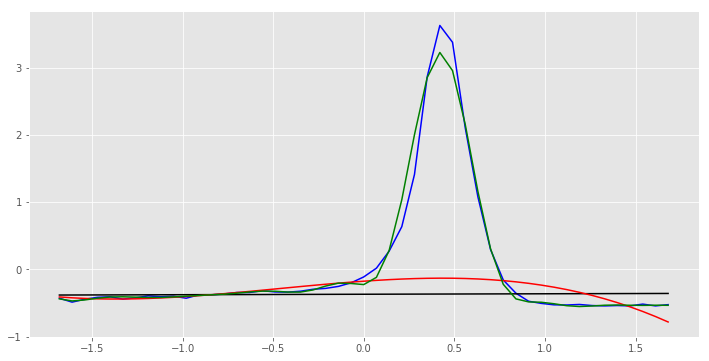

In [44]:
plt.plot(X, y, c='blue')
plt.plot(X, y_predicted_lin, c='black')
plt.plot(X, y_predicted_poly, c='red')
plt.plot(X, y_predicted_rbf, c='green')

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [57]:
## Your Code Here
wp_data = pd.read_csv('war_and_peace_es.txt', sep=" ", header=-1, names=['word', 'label'])
wp_data.label = 0
wp_en_data = pd.read_csv('war_and_peace_en.txt', sep=" ", header=-1, names=['word', 'label'])
wp_en_data.label = 1
wp_data = wp_data.append (wp_en_data, ignore_index=True)
wp_data.tail ()

,word,label
11398,leave,1
11399,her,1
11400,task,1
11401,was,1
11402,accomplished,1


In [58]:
# like this
wp_data.head ()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [68]:
from sklearn.cross_validation import train_test_split

In [71]:
RND_SEED = 123
rand_df = wp_data.sample(random_state=RND_SEED, n=2000)
rand_df = rand_df.reset_index(drop=True)
rand_df.tail()

,word,label
1995,volevamo,0
1996,alz,0
1997,ininterrotto,0
1998,scopo,0
1999,was,1


In [78]:
train, test = train_test_split(rand_df, test_size=0.4, random_state=RND_SEED)
print train.shape, test.shape

X_train = train.word
y_train = train.label
X_test = test.word
y_test = test.label

(1200, 2) (800, 2)


## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [80]:
import pylev

In [81]:
def K_rbf (U_i, V_i):
    gamma = 0.5
    d = pylev.levenschtein(U_i, V_i)
    return np.exp(-gamma * d ** 2)

def string_kernel(U, V):
    #Your Code Here
    matrix = np.zeros((U.shape[0], V.shape[0]))
    for i, u in enumerate(U):
        for j, v in enumerate(V):
            matrix[i, j] = K_rbf(u, v)
    return matrix

G = string_kernel(X_train, X_train)

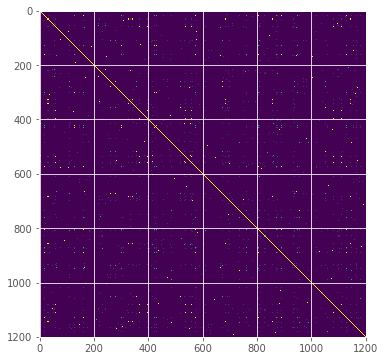

In [82]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
# Your Code Here
model = SVC(C=1, kernel='precomputed', random_state=RND_SEED)
model.fit(G, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

In [85]:
y_pred = model.predict (string_kernel(X_test, X_train))
accuracy_score (y_test, y_pred)

0.82874999999999999